In [371]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from matplotlib import pyplot as plt
pd.options.display.max_columns = None
import geopandas as gpd
import geoplot as gp
import plotly.figure_factory as ff


Can we explain viral through data?

Introduction


Hello reader, my goal in this study is to analyze the variables that either contribute or correlate with a specific Youtuber around their success in 2023, specifically in their subscribers and earnings. The goal is to understand which variables are most influential on success for a Youtuber, in which at the same time we must figure out how to measure success.

The main variables I'll be analyzing are Category, Enrollment %, Country, Population, Uploads, and Video Views. I chose these because they can have varying degrees of impact depending on the type of viewer and for their purpose. 

Although these there are many factors that can contribute to a Youtubers success that we may not understand yet, we will figure out how to measure success and look to predict future success with the information available.

HERE IS MY GITHUB FOR CODE.

Data

I used a dataset from Kaggle: https://www.kaggle.com/datasets/nelgiriyewithana/global-youtube-statistics-2023


In [3]:
df = pd.read_csv('Global_YouTube_Statistics.csv',encoding ='latin-1')

In [4]:
top10_yt_by_subs = df[['Youtuber','subscribers']].sort_values(by=['subscribers'],ascending=False).head(10)

In [5]:
top10_yt_by_subs

,Youtuber,subscribers
0,T-Series,245000000
1,YouTube Movies,170000000
2,MrBeast,166000000
3,Cocomelon - Nursery Rhymes,162000000
4,SET India,159000000
5,Music,119000000
6,ýýý Kids Diana Show,112000000
7,PewDiePie,111000000
8,Like Nastya,106000000
9,Vlad and Niki,98900000


Does having the most subscribers mean you make the most money? How do we rank if not?


In [6]:
top10_yt_by_hiyr = df[['Youtuber','highest_yearly_earnings','highest_monthly_earnings','lowest_yearly_earnings','lowest_monthly_earnings']].sort_values(by=['highest_yearly_earnings'],ascending=False).head(10)

In [7]:
top10_yt_by_hiyr

,Youtuber,highest_yearly_earnings,highest_monthly_earnings,lowest_yearly_earnings,lowest_monthly_earnings
495,ýýýýýýýýý KIMPRO,163400000.0,13600000.0,10200000.0,850900.0
417,DaFuq!?Boom!,110600000.0,9200000.0,6900000.0,576000.0
0,T-Series,108400000.0,9000000.0,6800000.0,564600.0
302,KL BRO Biju Rithvik,97600000.0,8100000.0,6100000.0,508100.0
3,Cocomelon - Nursery Rhymes,94800000.0,7900000.0,5900000.0,493800.0
4,SET India,87500000.0,7300000.0,5500000.0,455900.0
21,Zee TV,81900000.0,6800000.0,5100000.0,426800.0
139,StarPlus,80000000.0,6700000.0,5000000.0,416800.0
15,Sony SAB,79600000.0,6600000.0,5000000.0,414300.0
83,GR6 EXPLODE,78500000.0,6500000.0,4900000.0,408700.0


In [261]:
# top10_yt_by_hiyr.iloc[0,1]/top10_yt_by_hiyr.iloc[0,2]
# top10_yt_by_hiyr.iloc[0,3]/top10_yt_by_hiyr.iloc[0,4]

In [8]:
df.loc[:,'highest_yearly_earnings'] /df.loc[:,'subscribers'] 

0      4.424490e-01
1      3.411765e-09
2      3.897590e-01
3      5.851852e-01
4      5.503145e-01
           ...     
990    2.154472e+00
991    2.520325e-01
992    2.601626e-04
993    1.510569e-02
994    9.756098e-02
Length: 995, dtype: float64

Highest yearly earnings per subscriber ratio?

In [9]:
df['earnings_per_sub'] = df.loc[:,'highest_yearly_earnings'] /df.loc[:,'subscribers'] 

How do we maximize earnings per subscriber?

In [209]:
top10_earnings_per_sub = df[['Youtuber','earnings_per_sub','highest_yearly_earnings','subscribers','category']].sort_values(by=['earnings_per_sub'],ascending=False).head(10)

In [12]:
top10_earnings_per_sub


,Youtuber,earnings_per_sub,highest_yearly_earnings,subscribers
495,ýýýýýýýýý KIMPRO,9.231638,163400000.0,17700000
417,DaFuq!?Boom!,5.642857,110600000.0,19600000
798,ViralHog,4.678571,65500000.0,14000000
302,KL BRO Biju Rithvik,4.280702,97600000.0,22800000
905,GH'S,3.992308,51900000.0,13000000
712,Filaretiki,3.905405,57800000.0,14800000
483,BeatboxJCOP,3.666667,66000000.0,18000000
332,ZAMZAM ELECTRONICS TRADING,3.534562,76700000.0,21700000
970,_vector_,3.500000,43400000.0,12400000
388,dednahype,2.960396,59800000.0,20200000


In [214]:
fig = px.scatter(top10_earnings_per_sub, x="subscribers", y="highest_yearly_earnings",color = 'category')
fig2 = px.bar(top10_earnings_per_sub,x='Youtuber',y='earnings_per_sub', color = 'category')

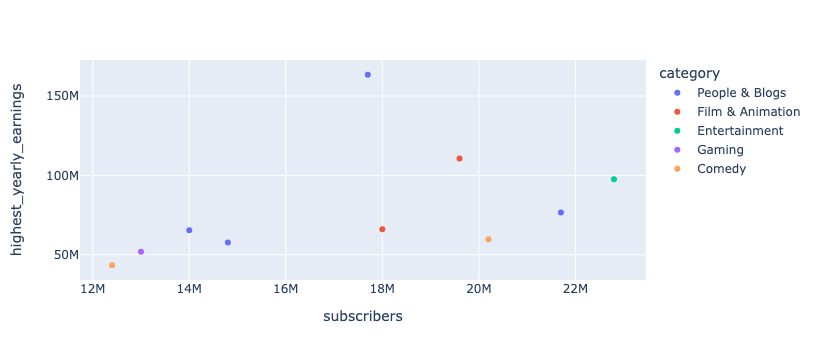

In [215]:
fig

the clustering chart with all the data might be goodfor this ^^

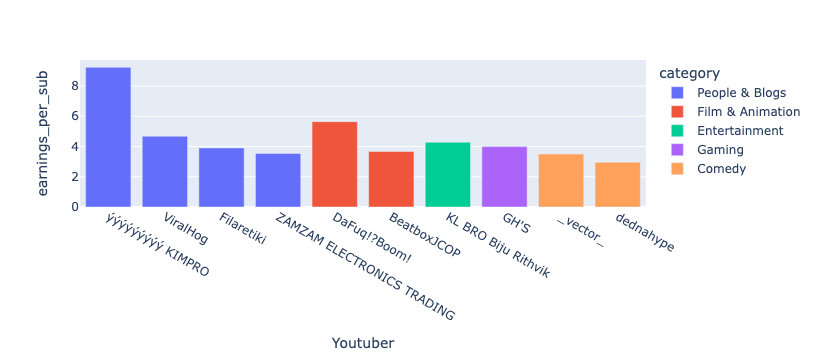

In [212]:
fig2

In [220]:
fig_df = px.scatter(df, x="subscribers", y="highest_yearly_earnings",color = 'Country')


In [368]:
fig_df3 = px.scatter(df, x="subscribers", y="highest_yearly_earnings",color = 'category')


In [241]:
fig_df2 = px.histogram(df, x="Country", y="subscribers",hover_data = ['highest_yearly_earnings'])


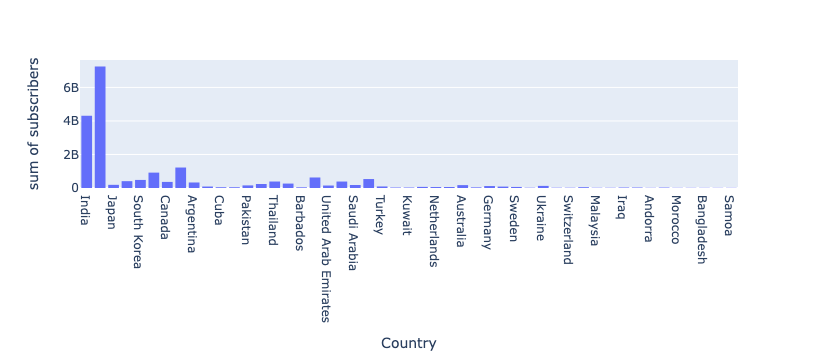

In [242]:
fig_df2

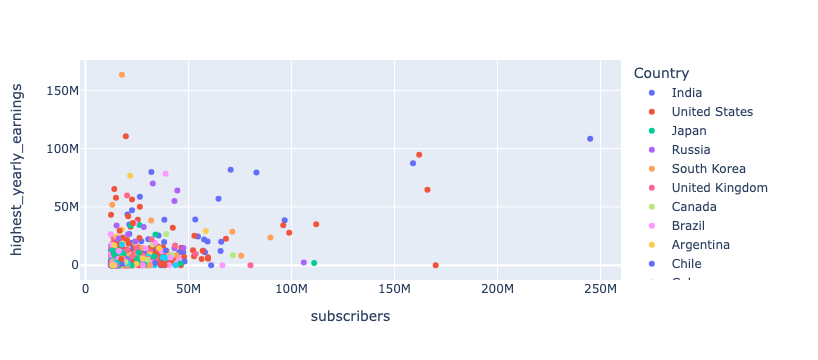

In [221]:
fig_df

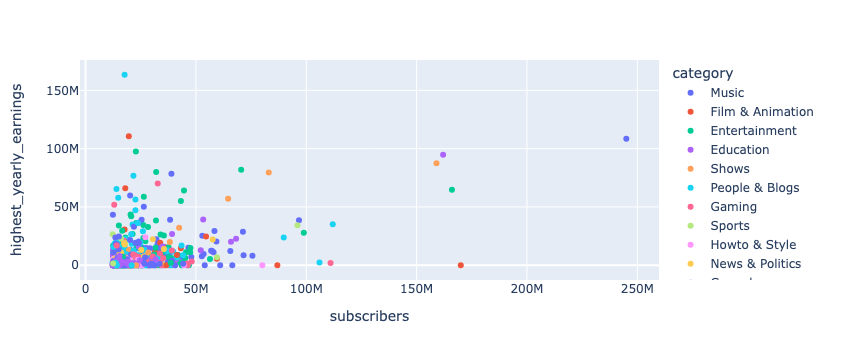

In [369]:
fig_df3

Potentially look at relationships with the other top 10 charts ^^ revisit this

WORLD PLOTS vv

In [520]:
loc_df = df.groupby('Country')

In [522]:
loc_df.count()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,earnings_per_sub
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Andorra,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,0,0,1
Argentina,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,11,13,13,13,13,13,13,13,13,13,13
Australia,9,9,9,9,9,9,9,9,8,9,9,8,8,9,9,9,9,2,8,8,8,9,9,9,9,9,9,9
Bangladesh,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1
Barbados,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Brazil,62,62,62,62,62,62,62,62,62,61,61,61,60,62,62,62,62,33,61,61,61,62,62,62,62,62,62,62
Canada,15,15,15,15,15,15,15,15,15,15,15,15,13,15,15,15,15,7,15,15,15,15,15,15,15,15,15,15
Chile,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [530]:
fig4 = px.bar(np.log(df),x='Country',y='earnings_per_sub')
fig4

/Users/briandrewes/anaconda3/lib/python3.11/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning:

divide by zero encountered in log

/Users/briandrewes/anaconda3/lib/python3.11/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning:

invalid value encountered in log



TypeError: loop of ufunc does not support argument 0 of type str which has no callable log method

/var/folders/bf/8_s8z7kn3l979_b34wzrg6yr0000gn/T/ipykernel_72708/3049329737.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




AttributeError: 'Axes' object has no attribute 'show'

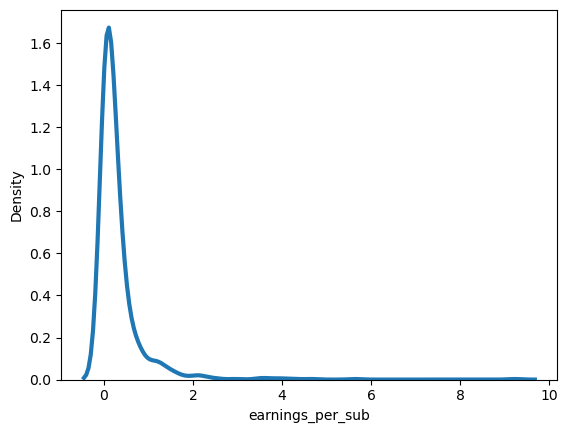

In [513]:
# have to use the original dataframe with the categories i filtered out for group analysis
fig_density = sns.distplot(df['earnings_per_sub'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = df['category'])
fig_density.show()

In [146]:
# DATA CLEANING BELOW
#list taken from online listing the categories in youtube channels
test = sorted(['Film & Animation','Autos & Vehicles','Music','Pets & Animals','Sports','Travel & Events','Gaming','People & Blogs','Comedy','Entertainment','News & Politics','Howto & Style','Education','Science & Technology','Nonprofits & Activism'])

In [183]:
#checking the category unique values to compare with the list online versus the channel_type column
orig1 = list(df.category.unique())

In [180]:
orig1.remove(orig1[5])

In [182]:
orig1 = sorted(orig1)
orig1

TypeError: '<' not supported between instances of 'float' and 'str'

In [145]:
#channel_type column, and also being used to transfer the filled fields that were NaN in category
orig2 = list(df.channel_type.unique())
orig2=sorted(orig2)
orig2

['Animals',
 'Autos',
 'Comedy',
 'Education',
 'Entertainment',
 'Film',
 'Games',
 'Howto',
 'Music',
 'News',
 'Nonprofit',
 'People',
 'Sports',
 'Tech']

In [80]:

new_list = list(set(test).difference(orig1))
new_list

[]

In [78]:
new_list = list(set(test).difference(orig2))
new_list

['Travel & Events',
 'People & Blogs',
 'News & Politics',
 'Pets & Animals',
 'Nonprofits & Activism',
 'Gaming',
 'Autos & Vehicles',
 'Howto & Style',
 'Film & Animation',
 'Science & Technology']

In [129]:
df[df.category.isnull()].sort_values(by='video views')
#removing the rows that look like incorrect / null data due to pulling from a category as a whole?
df = df.drop([5,592,102,173,18,12,360], axis=0)


In [160]:
#cleaning NaN, replacing NaN with channel_type then cleaning channel type

In [174]:
def cat_cleaner(string):
    if string == 'Animals': 
        return 'Pets & Animals'
    elif string == 'Autos': 
        return 'Autos & Vehicles'
    elif string == 'Film': 
        return 'Film & Animation'
    elif string == 'Games': 
        return 'Gaming'
    elif string == 'Howto': 
        return 'Howto & Style'
    elif string == 'News': 
        return 'News & Politics'
    elif string == 'Nonprofit': 
        return 'Nonprofits & Activism'
    elif string == 'People': 
        return 'People & Blogs'
    elif string == 'Tech': 
        return 'Science & Technology'
    else:
        return string 


In [175]:
for index, row in df.iterrows():
    if df.category.isnull()[index]:
        df.category[index] = cat_cleaner(df.channel_type[index])

/var/folders/bf/8_s8z7kn3l979_b34wzrg6yr0000gn/T/ipykernel_72708/1800208598.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [147]:
## DATA CLEANING ABOVE


In [202]:
countrygrp = df.groupby('Country')

In [203]:
countrygrp

Keep in minds: there is a MrBeast & MrBeast2, multiple accounts?
Also, must clean the 'Music' Gaming and etc records out


USE TOTAL SCATTER POINT AFTER FINDING A LEVEL OF SUBSCRIBERS OR UPLOADS THAT LEADS TO HIGHER GROWTH? IS THERE ONE?

CATEGORY BY COUNTRY SUCCESS

potentially webscrape for links (such as has X links which could be twitters instagrams etc.) to add another variable?


CREATE TIER 1-5 BASED ON QUARTILES?

or figure out top 5 in each category... what determines success there?


In [345]:
# i want to explore what sets categories apart, and if there are dramatic differences in 
# earnings per sub for each

In [359]:
cat_df = df.groupby('category').mean()


/var/folders/bf/8_s8z7kn3l979_b34wzrg6yr0000gn/T/ipykernel_72708/1395692835.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [533]:
df.groupby('category').count()

,rank,Youtuber,subscribers,video views,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,earnings_per_sub
category,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Autos & Vehicles,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Comedy,70,70,70,70,70,70,67,67,67,70,67,66,63,70,70,70,70,44,70,70,70,67,67,67,67,67,67,70
Education,48,48,48,48,48,48,45,45,48,48,45,48,45,48,48,48,48,37,48,48,48,45,45,45,45,45,45,48
Entertainment,255,255,255,255,255,255,227,227,246,255,228,246,240,255,255,255,255,168,254,254,254,227,227,227,227,227,227,255
Film & Animation,47,47,47,47,47,47,37,37,46,47,38,46,45,47,47,47,47,35,47,47,47,37,37,37,37,37,37,47
Gaming,98,98,98,98,98,98,85,85,96,98,86,96,93,98,98,98,98,63,97,97,97,85,85,85,85,85,85,98
Howto & Style,41,41,41,41,41,41,35,35,38,41,35,38,39,41,41,41,41,18,41,41,41,34,34,34,34,34,34,41
Movies,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Music,203,203,203,203,203,203,182,182,200,202,185,199,194,203,203,203,203,122,201,201,201,182,182,182,182,182,182,203


In [542]:
df.highest_yearly_earnings.shape

(988,)

In [544]:
df.subscribers.shape

(988,)

In [537]:
figheat = px.imshow(df, x='subscribers', y='highest_yearly_earnings')
figheat.update_layout(width=500,height=500)
figheat.show()

ValueError: The length of the y vector must match the length of the first dimension of the img matrix.

In [364]:
# didn't have a considerable count, less than 5% of the data overall and 
# could influence our view on earnings per sub potentials
cat_df = cat_df[df.groupby('category')['rank'].count() > 20].dropna(axis=0, how='any')


In [365]:
cat_df['earnings_per_sub'] = cat_df.highest_yearly_earnings / cat_df.subscribers
cat_df = cat_df.sort_values('earnings_per_sub',ascending=True)
cat_df

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,earnings_per_sub
category,,,,,,,,,,,,,,,,,,,,,,
Howto & Style,590.634146,1.938780e+07,4.928824e+09,1640.707317,471035.975610,302.371429,425.315789,5.046056e+07,12002.293171,191723.471707,143797.469756,2.303871e+06,205555.722222,2013.536585,15.512195,65.120588,4.755448e+08,9.227941,2.470972e+08,27.174177,-19.394497,0.118831
Gaming,546.285714,2.072347e+07,7.580884e+09,4201.244898,577945.510204,318.209302,868.291667,8.545095e+07,20275.174286,325430.401837,242748.827041,3.889056e+06,247635.539683,2012.206186,15.773196,73.041176,2.042175e+08,9.388000,1.436248e+08,29.233852,-27.101138,0.187664
Music,447.463054,2.566256e+07,1.540049e+10,2326.985222,402191.282178,267.210811,624.788945,1.788747e+08,34605.686749,552519.822414,414965.361921,6.645988e+06,202551.016393,2010.562189,15.383085,66.775824,3.901276e+08,10.045385,2.163435e+08,26.960006,-28.057168,0.258976
Film & Animation,374.404255,2.824255e+07,1.158689e+10,2741.382979,777429.468085,794.368421,1226.456522,2.056338e+08,44810.936383,717112.408936,535541.748298,8.610398e+06,520084.714286,2012.510638,14.574468,59.243243,5.747856e+08,9.822703,2.802865e+08,20.831557,-19.051344,0.304873
Education,490.854167,2.592292e+07,1.456117e+10,2957.062500,346891.875000,315.733333,661.625000,1.873045e+08,43902.271042,703418.752083,525920.835000,8.426465e+06,310810.810811,2013.854167,16.125000,59.682222,6.763991e+08,9.205556,3.052293e+08,25.481941,-6.073126,0.325059
Entertainment,509.627451,2.141451e+07,1.054481e+10,11283.486275,582881.800000,428.846491,844.349593,1.784597e+08,38461.593725,614317.510353,460920.381804,7.384843e+06,400244.154762,2013.200787,16.078740,61.996916,4.419248e+08,9.144890,2.280097e+08,26.569924,-7.925772,0.344852
News & Politics,506.038462,2.063077e+07,1.039969e+10,112484.384615,325016.307692,457.846154,527.000000,1.607470e+08,40192.625000,642631.961538,483680.692308,7.707753e+06,268095.238095,2008.923077,17.000000,44.411538,6.906570e+08,6.505385,2.771031e+08,24.890536,40.582362,0.373605
Comedy,522.514286,2.010429e+07,7.969641e+09,1103.785714,458050.328571,487.104478,346.863636,1.853106e+08,41269.428571,658764.900000,493809.742857,7.923786e+06,450005.818182,2013.342857,16.357143,61.225373,4.813896e+08,9.492836,2.399634e+08,22.965873,-18.793091,0.394134
People & Blogs,544.423611,2.065417e+07,9.442602e+09,8594.354167,714696.645833,412.612069,1033.264286,1.806343e+08,43098.613611,689735.806667,517345.612014,8.272868e+06,445995.051020,2015.111888,16.020979,63.573276,3.580775e+08,8.649828,2.015990e+08,26.948385,-3.743098,0.400542


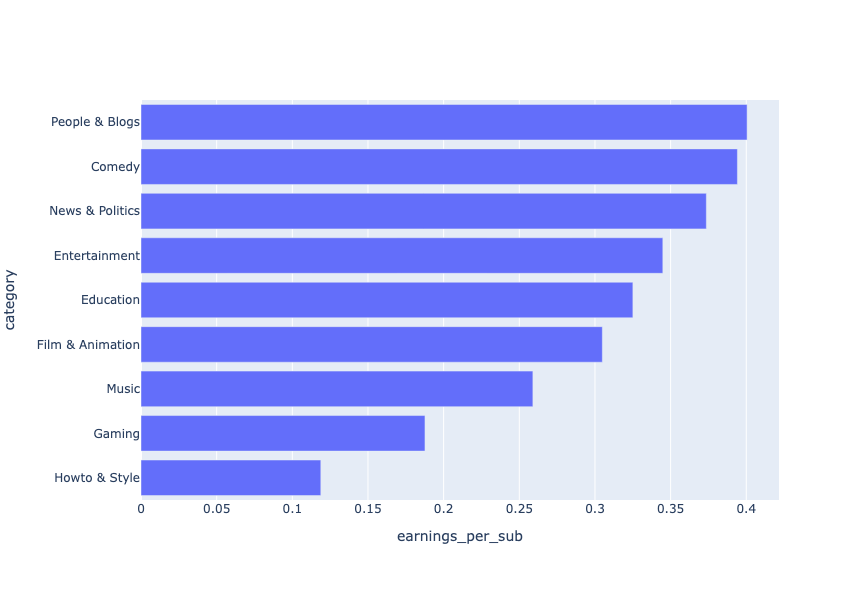

In [366]:
fig3 = px.bar(cat_df,x='earnings_per_sub', orientation='h')
fig3.update_layout(yaxis={"dtick":1},margin={"t":100,"b":100},height=600)

CHECK FOR MULTI COLLINEARITY

In [5]:
df.describe()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,995.00000,9.950000e+02,9.950000e+02,995.000000,9.940000e+02,879.000000,962.000000,9.390000e+02,995.000000,9.950000e+02,9.950000e+02,9.950000e+02,6.580000e+02,990.000000,990.000000,872.000000,8.720000e+02,872.000000,8.720000e+02,872.000000,872.000000
mean,498.00000,2.298241e+07,1.103954e+10,9187.125628,5.542489e+05,386.053470,745.719335,1.756103e+08,36886.148281,5.898078e+05,4.422574e+05,7.081814e+06,3.490791e+05,2012.630303,15.746465,63.627752,4.303873e+08,9.279278,2.242150e+08,26.632783,-14.128146
std,287.37606,1.752611e+07,1.411084e+10,34151.352254,1.362782e+06,1232.244746,1944.386561,4.163782e+08,71858.724092,1.148622e+06,8.612161e+05,1.379704e+07,6.143554e+05,4.512503,8.777520,26.106893,4.727947e+08,4.888354,1.546874e+08,20.560533,84.760809
min,1.00000,1.230000e+07,0.000000e+00,0.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1970.000000,1.000000,7.600000,2.025060e+05,0.750000,3.558800e+04,-38.416097,-172.104629
25%,249.50000,1.450000e+07,4.288145e+09,194.500000,3.230000e+02,11.000000,27.000000,2.013750e+07,2700.000000,4.350000e+04,3.265000e+04,5.217500e+05,1.000000e+05,2009.000000,8.000000,36.300000,8.335541e+07,5.270000,5.590832e+07,20.593684,-95.712891
50%,498.00000,1.770000e+07,7.760820e+09,729.000000,9.155000e+02,51.000000,65.500000,6.408500e+07,13300.000000,2.127000e+05,1.595000e+05,2.600000e+06,2.000000e+05,2013.000000,16.000000,68.000000,3.282395e+08,9.365000,2.706630e+08,37.090240,-51.925280
75%,746.50000,2.460000e+07,1.355470e+10,2667.500000,3.584500e+03,123.000000,139.750000,1.688265e+08,37900.000000,6.068000e+05,4.551000e+05,7.300000e+06,4.000000e+05,2016.000000,23.000000,88.200000,3.282395e+08,14.700000,2.706630e+08,37.090240,78.962880
max,995.00000,2.450000e+08,2.280000e+11,301308.000000,4.057944e+06,7741.000000,7741.000000,6.589000e+09,850900.000000,1.360000e+07,1.020000e+07,1.634000e+08,8.000000e+06,2022.000000,31.000000,113.100000,1.397715e+09,14.720000,8.429340e+08,61.924110,138.252924


In [23]:
print(f'Lowest Monthly Mean = {df.lowest_monthly_earnings.mean()}')
print(f'Highest Monthly Mean = {df.highest_monthly_earnings.mean()}')

Lowest Monthly Mean = 36886.14828140703
Highest Monthly Mean = 589807.8475879397


In [24]:
print(f'Lowest Yearly Mean = {df.lowest_yearly_earnings.mean()}')
print(f'Highest Yearly Mean = {df.highest_yearly_earnings.mean()}')

Lowest Yearly Mean = 442257.39253266336
Highest Yearly Mean = 7081813.919527639


In [6]:
channel_type = df.groupby('channel_type').sum()

/var/folders/bf/8_s8z7kn3l979_b34wzrg6yr0000gn/T/ipykernel_1510/2747749246.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  channel_type = df.groupby('channel_type').sum()


In [51]:
counter = 0
for i in df['rank']:
    counter += 1
counter

995

In [54]:
youtubers = np.array([df.Youtuber])

In [55]:
youtubers

array([['T-Series', 'YouTube Movies', 'MrBeast',
        'Cocomelon - Nursery Rhymes', 'SET India', 'Music',
        'ýýý Kids Diana Show', 'PewDiePie', 'Like Nastya',
        'Vlad and Niki', 'Zee Music Company', 'WWE', 'Gaming',
        'BLACKPINK', 'Goldmines', 'Sony SAB', '5-Minute Crafts',
        'BANGTANTV', 'Sports', 'Justin Bieber', 'HYBE LABELS', 'Zee TV',
        "Pinkfong Baby Shark - Kids' Songs & Stories", 'Canal KondZilla',
        'ChuChu TV Nursery Rhymes & Kids Songs', 'Shemaroo Filmi Gaane',
        'Colors TV', 'T-Series Bhakti Sagar', 'Dude Perfect',
        'Movieclips', 'Tips Official', 'El Reino Infantil', 'Wave Music',
        'Aaj Tak', 'Sony Music India', 'EminemMusic', 'Marshmello',
        'YRF', "LooLoo Kids - Nursery Rhymes and Children's Songs",
        'Ed Sheeran', 'Infobells - Hindi', 'Taylor Swift',
        'Ariana Grande',
        'BillionSurpriseToys  - Nursery Rhymes & Cartoons',
        'JuegaGerman', 'Billie Eilish', 'Get Movies', 'Shemaroo',
  

<Axes: xlabel='uploads', ylabel='highest_yearly_earnings'>

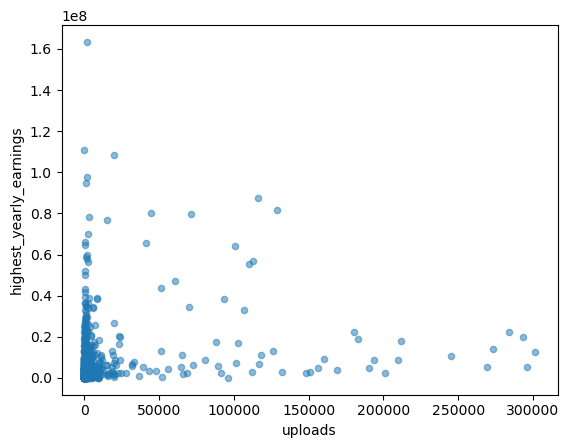

In [67]:
uploads_vs_yearnings = df[['uploads','highest_yearly_earnings']]
uploads_vs_yearnings.plot.scatter('uploads', 'highest_yearly_earnings',alpha=.5)

/Users/briandrewes/anaconda3/lib/python3.11/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


<Axes: xlabel='uploads', ylabel='highest_yearly_earnings'>

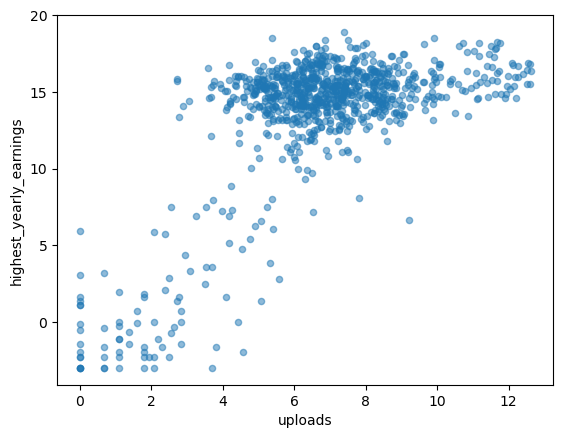

In [46]:
log_uploads_vs_yearnings = np.log(df[['uploads','highest_yearly_earnings']])
log_uploads_vs_yearnings.plot.scatter('uploads', 'highest_yearly_earnings',alpha=.5)

<Axes: xlabel='Country'>

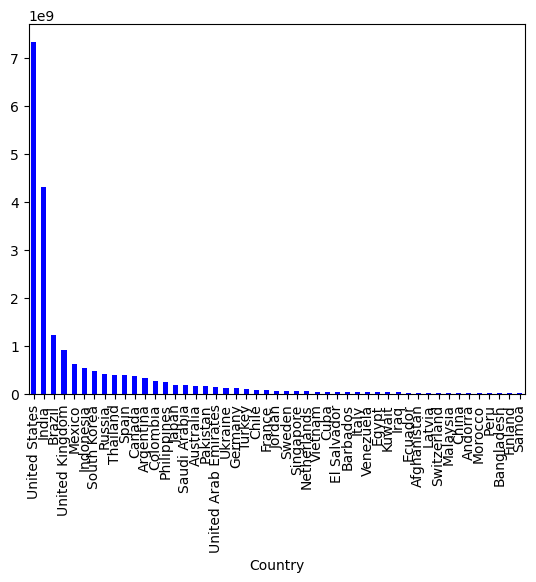

In [34]:
df.groupby('Country')['subscribers'].sum().sort_values(ascending=False).plot.bar(color='b')

<Axes: xlabel='Country'>

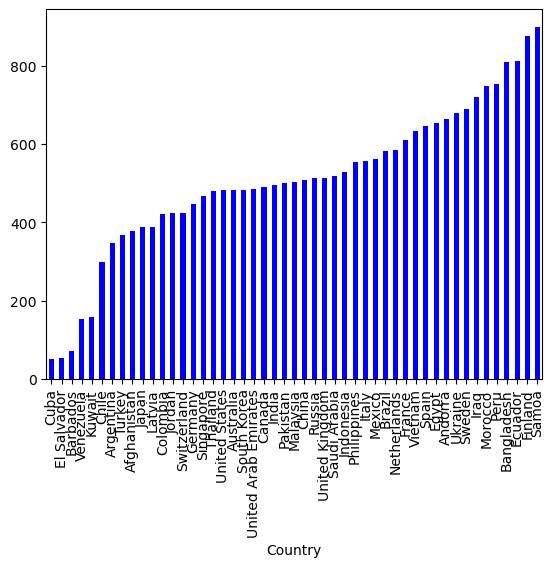

In [43]:
df.groupby('Country')['rank'].mean().sort_values(ascending=True).plot.bar(color='b')

<Axes: xlabel='Country'>

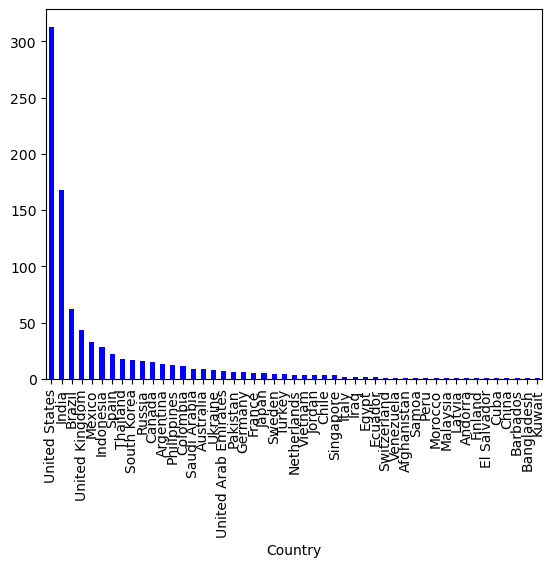

In [38]:
df.groupby('Country')['highest_yearly_earnings'].count().sort_values(ascending=False).plot.bar(color='b')

<Axes: xlabel='Country'>

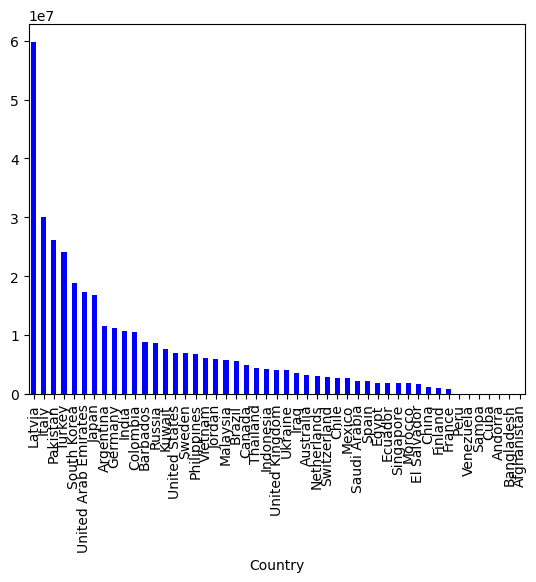

In [37]:
df.groupby('Country')['highest_yearly_earnings'].mean().sort_values(ascending=False).plot.bar(color='b')

In [ ]:
countryGrid = sns.FacetGrid(df, row = 'Country', col = 'country_rank',  palette = "Set2")
countryGrid.map(sns.regplot,'subscribers','highest_yearly_earnings')
countryGrid.add_legend()

In [18]:
country_chart = df.groupby(['Country']).sum().reset_index()

/var/folders/bf/8_s8z7kn3l979_b34wzrg6yr0000gn/T/ipykernel_1510/3340360178.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  country_chart = df.groupby(['Country']).sum().reset_index()


In [21]:
country_chart.plt.bar(color='b')

AttributeError: 'DataFrame' object has no attribute 'plt'

In [41]:
channel_type

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
channel_type,,,,,,,,,,,,,,,,,,,,,
Animals,1434,58600000,4.413526e+10,42868,1650.0,340.0,6.0,2.122043e+09,529700.00,8.500000e+06,6.400000e+06,1.017000e+08,2300000.0,6048.0,59.0,264.6,9.847186e+08,44.10,8.119891e+08,111.270720,-287.138673
Autos,1600,64400000,1.957755e+10,949,7525878.0,3515.0,7174.0,3.532615e+08,88300.63,1.400010e+06,1.100007e+06,1.700012e+07,500011.0,6025.0,46.0,100.0,1.359971e+08,4.64,1.242622e+08,59.628900,192.100742
Comedy,26410,1063700000,4.531406e+11,81722,19203885.0,11727.0,18026.0,9.600747e+09,2380825.91,3.796821e+07,2.853711e+07,4.571165e+08,14500102.0,102640.0,846.0,2884.7,2.383613e+10,449.57,1.170579e+10,1216.052168,-975.847662
Education,22886,1300200000,7.648059e+11,146355,4460808.0,3297.0,6032.0,9.220914e+09,2305400.00,3.695910e+07,2.762670e+07,4.426973e+08,11900000.0,98671.0,800.0,2822.3,3.046864e+10,437.50,1.389784e+10,1340.305527,-691.252957
Entertainment,151765,6922500000,3.371893e+12,3345035,72195285.0,80430.0,141260.0,6.386184e+10,13367692.29,2.136498e+08,1.602485e+08,2.566705e+09,92140647.0,611922.0,4812.0,18173.1,1.141862e+11,2648.69,6.258352e+10,7665.343584,-3397.186576
Film,19421,964400000,4.592427e+11,114654,20630291.0,14060.0,27166.0,5.763538e+09,1221630.04,1.951350e+07,1.463080e+07,2.344610e+08,10901031.0,84560.0,633.0,1940.7,2.158831e+10,302.16,9.886827e+09,871.540244,-165.298217
Games,53695,2111600000,7.266072e+11,399473,85377036.0,71004.0,141983.0,8.598094e+09,2150096.03,3.452302e+07,2.569682e+07,4.123766e+08,17806618.0,195202.0,1655.0,6162.5,2.007317e+10,823.24,1.300515e+10,2404.463013,-2183.165409
Howto,21492,649100000,1.956506e+11,79417,118096.0,2549.0,843.0,2.127236e+09,531829.00,8.484200e+06,6.413200e+06,1.022567e+08,3800000.0,72531.0,488.0,2004.8,1.634754e+10,300.66,8.474860e+09,719.601107,-636.538487
Music,93321,5771500000,3.252736e+12,424950,78545673.0,62756.0,126673.0,3.753254e+10,7732437.91,1.234617e+08,9.267589e+07,1.485024e+09,28910422.0,432294.0,3283.0,12948.6,8.498069e+10,1995.87,4.515133e+10,5409.958285,-5274.958538


In [ ]:
x = np.arange(len(category_rev_data))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for cat in category_rev_data:
    offset = width * multiplier
    rects = ax.bar(x + offset, category_rev_data[cat], width, label=cat)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Dollars (USD)')
ax.set_title('Revenue Information by Category')

ax.set_xticks(x + width, category_rev_data)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1000000)

plt.show()

In [35]:
print(channel_type)

                 rank  subscribers   video views  uploads  video_views_rank  \
channel_type                                                                  
Animals          1434     58600000  4.413526e+10    42868            1650.0   
Autos            1600     64400000  1.957755e+10      949         7525878.0   
Comedy          26410   1063700000  4.531406e+11    81722        19203885.0   
Education       22886   1300200000  7.648059e+11   146355         4460808.0   
Entertainment  151765   6922500000  3.371893e+12  3345035        72195285.0   
Film            19421    964400000  4.592427e+11   114654        20630291.0   
Games           53695   2111600000  7.266072e+11   399473        85377036.0   
Howto           21492    649100000  1.956506e+11    79417          118096.0   
Music           93321   5771500000  3.252736e+12   424950        78545673.0   
News            15832    611700000  3.113528e+11  3989151        10124741.0   
Nonprofit         628     55500000  1.086291e+10   2

Future Ideas: #\n
If there are 'viral' characteristics that will boost a youtuber immensively or analyze certain events where subscribers sky rocket in a short time and why

Get video length, avg video length per category to find how and why each one performs better

Time series for similar data sets and tracking trends ovre the years and locations difference

also would love to integrate another data set to track conversion rates on per video view equals subscriber

heavily time investive project would incorporate all of the youtubers platforms such as tiktok, instagram, twitter etc to see cross consumption and further analyses